In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
import math

### Assignment 12
## 1.
My interpretation of this is to fund the CDF upto that point 2 and minus 1 from it to find the complementary value. All we need is the CDF function.

In [88]:
def CauchyFunction():
    return (1 - cauchy.cdf(2,loc=0,scale=1))

In [89]:
CauchyFunction()

0.14758361765043326

## 2.

I am unsure as to how to solve this question, doesnt proving a function is the pdf doesnt that mean we need to check it equals to 1.0 or asymptopes to that value as we go through all possible values of x?

**incorrect, Remember there are significant rules for a function being a pdf**

Its integral from - infinity to + infinity must equal to 1.

This is along the same lines as the metho you were attempting, but approximating the improper integral was a little difficult but doable as you did on paper.

$$\int_2^\inf g(x) = 1$$

Note, we have a value of 2 here due to the inbdicator value signifying the entire function to be equal to 0, if the value is below 2.

**this does approximate to $\frac{2}{2} - 0$ which of course is 1**

# 3. 

The upside down A means "for All". The question is asking 

"Check that the condition :

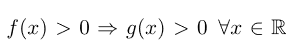

Is not satisfied"

The condition is not satisfied as for the value of x = 0, we get g(0) = 0

This can still be used in the importance sample method due to the easily checkable calculation in the lecture notes that state:


$$h(x)f(x) > 0$$ equate to $$g(x) > 0$$ for any x

# 4.

To sample from g, we would first need to integrate the function g with respect to x, then we need to calculate the inverse of the now CDF function.

### 5+6. Importance sampling estimator for P(X > 2)

1. We generate the random variables on the distribution of g, 
2. We pass these variables through the $\omega(X_i)$ function.

$$\omega(X_i) = \frac{f(X_i)}{g(X_i)}$$

3. We then multiply these by our $h(X_i)$ function. This can just be an indicator function corresponding to 1 if the value is less than 2, 0 if not.



In [84]:
def g(x):
    if(x < 2):
        multi = 0
    elif(x>=2):
        multi=(2 / (x**2))
    return multi

def f(x):
    val = math.pi*(1+(x**2))
    return 1/val

def omega(x):
    if(g(x) == 0):
        return 0
    return f(x) / g(x)

In [90]:

def RandomGeneration_g(size):
    U = np.random.random(size=size)
    U = 2/(1-U)
    #Compute the inverse CDF calculation.
    return U
    
        
def h(x):
    if(x > 2):
        return 1
    else:
        return 0
            
            

In [91]:
sample_size=10_000

X = RandomGeneration_g(sample_size)

In [92]:
summation = 0
for i in X:
    temp1 = omega(i)
    temp2 = h(i)
    summation+= (temp1*temp2)
mean = summation / len(X)

print(mean)
    

0.1475432803706105
